In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
N = 3600
lRand = 0.1 * np.random.randn(N)
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : np.sin(2* np.pi * 20 * np.arange(N)/N)})

# keep the trend at the beginning of the signal, remove negative values at the end
df_train['Signal'] = df_train['Signal'].apply(lambda x : max(x,0)) + lRand * lRand


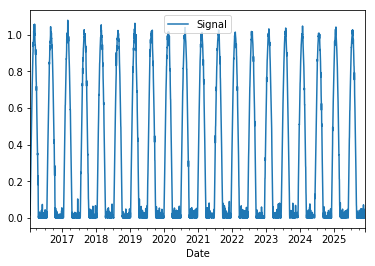

In [3]:
df_train.plot('Date' , 'Signal')

In [4]:

import pyaf.ForecastEngine as autof
lEngine = autof.cForecastEngine()
lEngine.mOptions.set_active_transformations([])
lEngine.mOptions.set_active_trends(['LinearTrend' , 'PolyTrend'])
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Signal' 2.4998836517333984
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2023-12-07T00:00:00.000000 TimeDelta=1 days Estimation = (0 , 2874) Validation = (2874 , 3593) Test = (3593 , 3600) Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_Signal' Min=3.14325763451e-09 Max=1.07816541727  Mean=0.328210672281 StdDev=0.38556152364
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_LinearTrend_residue_bestCycle_byL2_residue_AR(64)' [LinearTrend + Cycle_Length_30 + AR(64)]
INFO:pyaf.std:TREND_DETAIL '_Signal_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_LinearTrend_residue_bestCycle_byL2' [Cycle_Length_30]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_LinearTrend_residue_bestCycle_byL2_residue_AR(64)' [AR(64)]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=2827.2811 MAPE_Forecast=838.5239 MAPE_Test=4.5133
INFO:pyaf.std:MODEL_SMAPE S

INFO:pyaf.std:START_PLOTTING
/home/antoine/dev/python/packages/pyaf/TS/Plots.py:30: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/antoine/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/anto

INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.9088590145111084


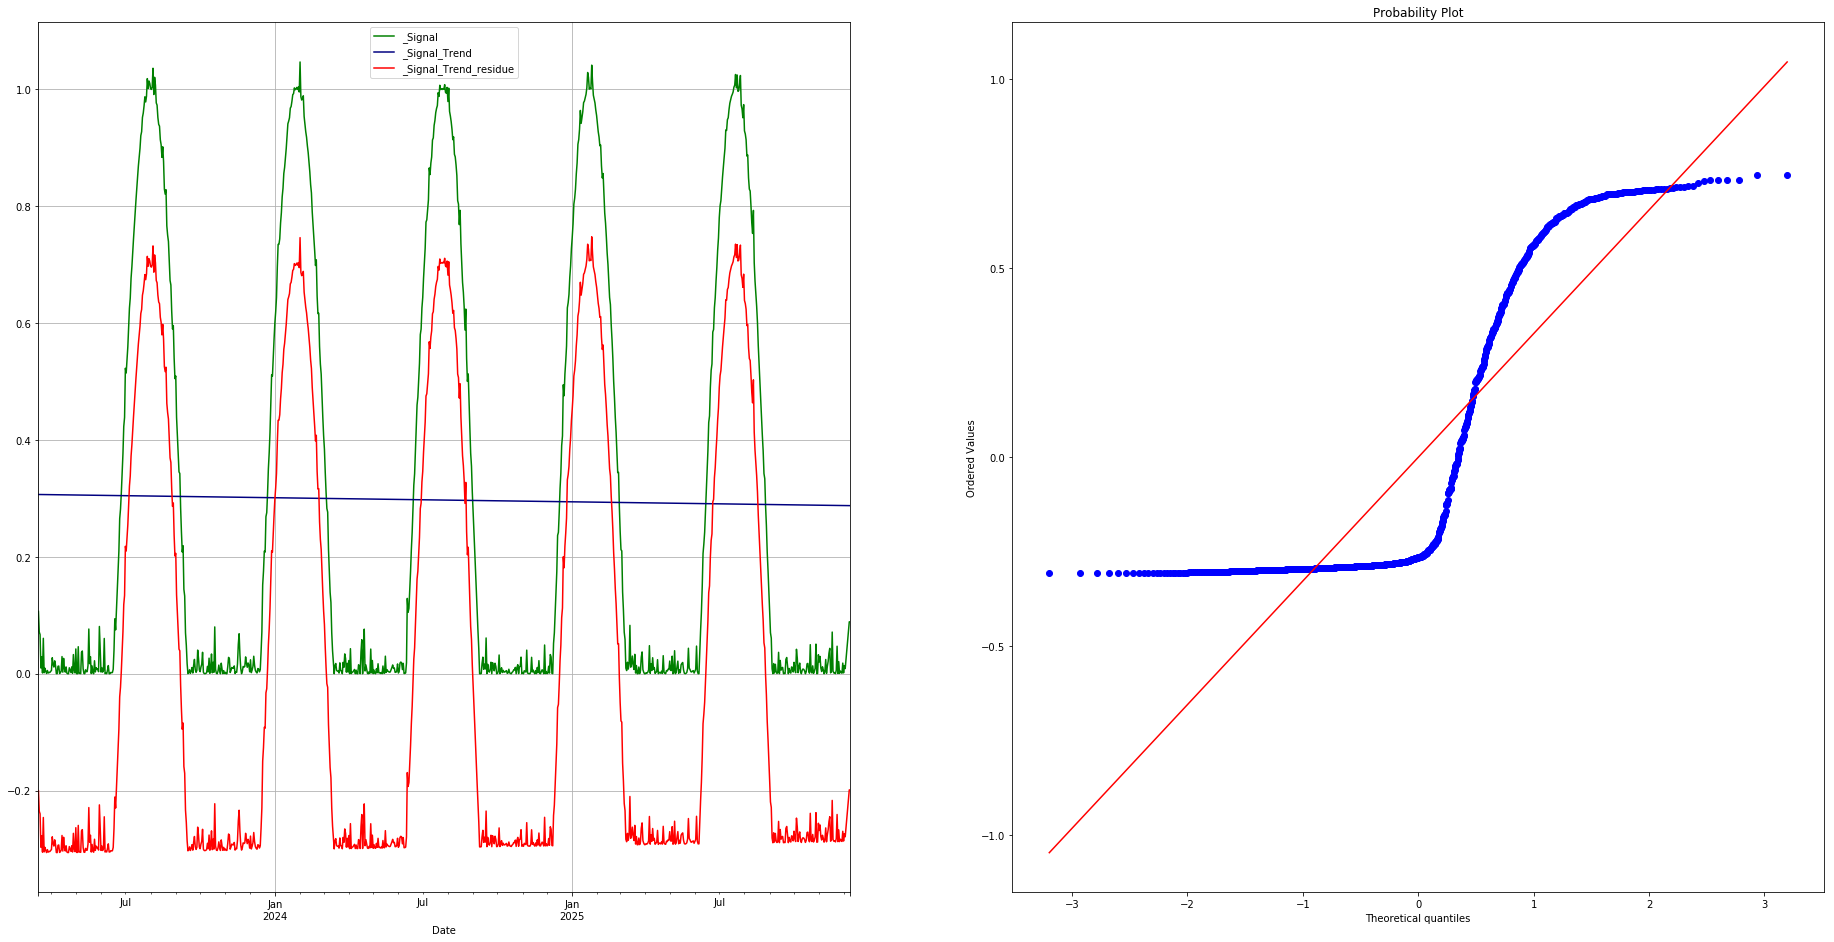

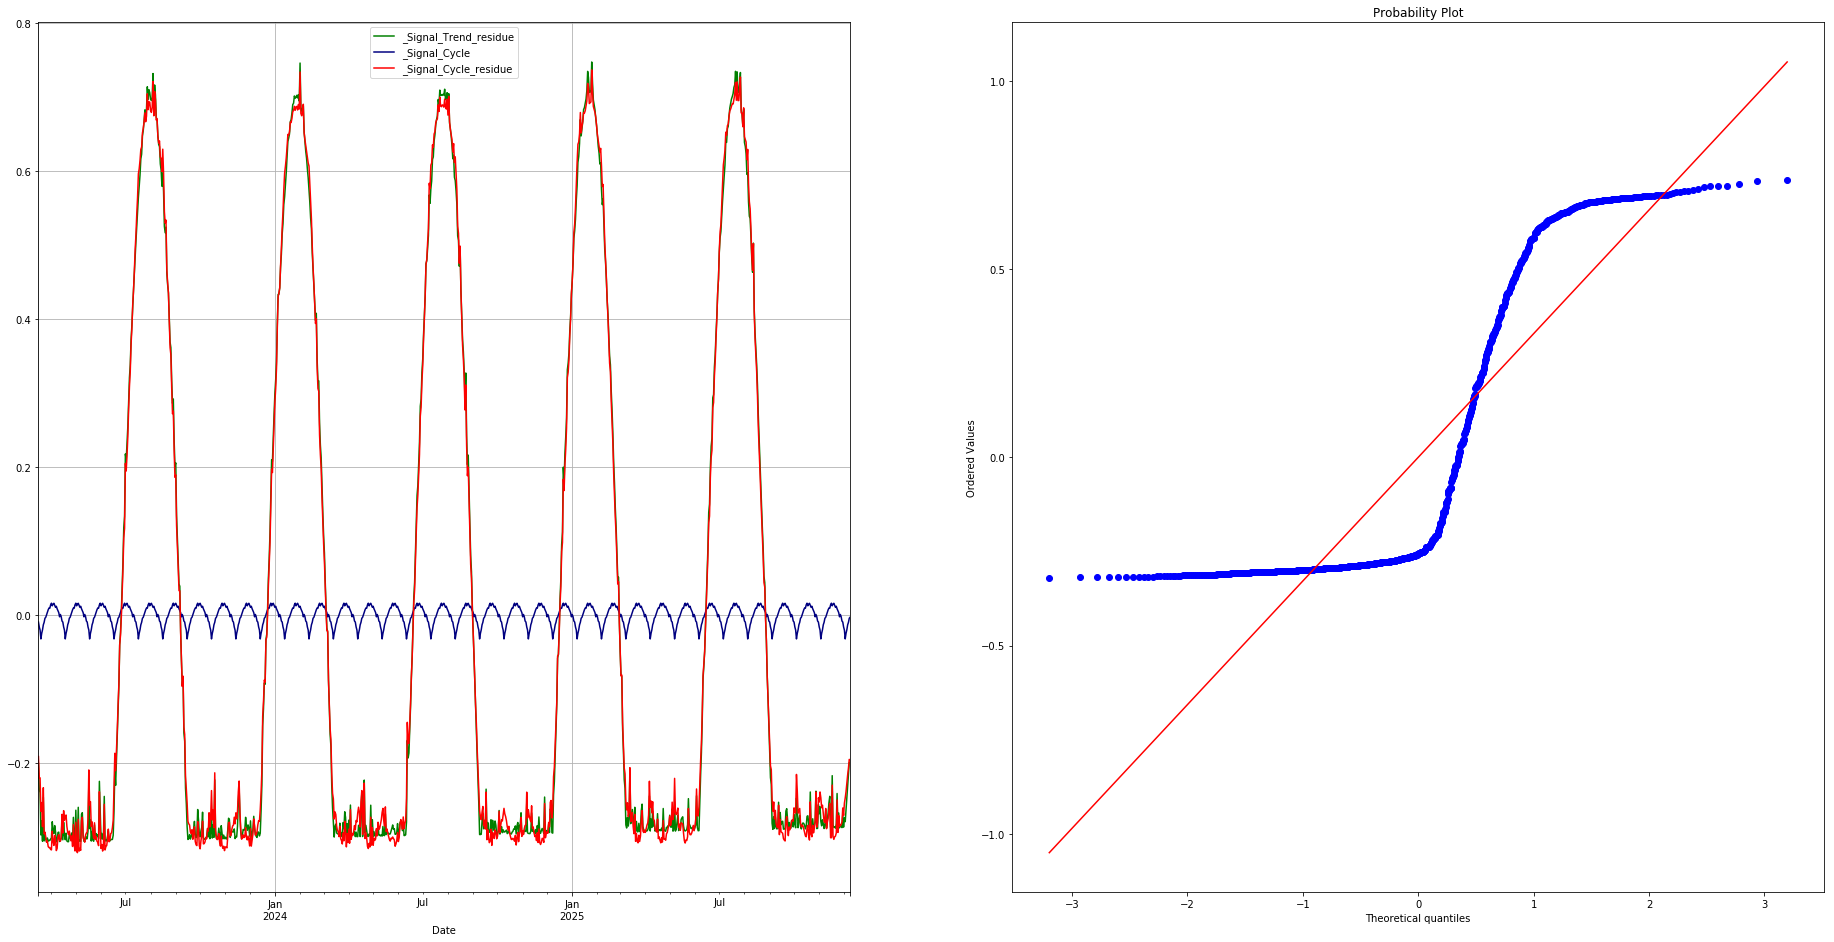

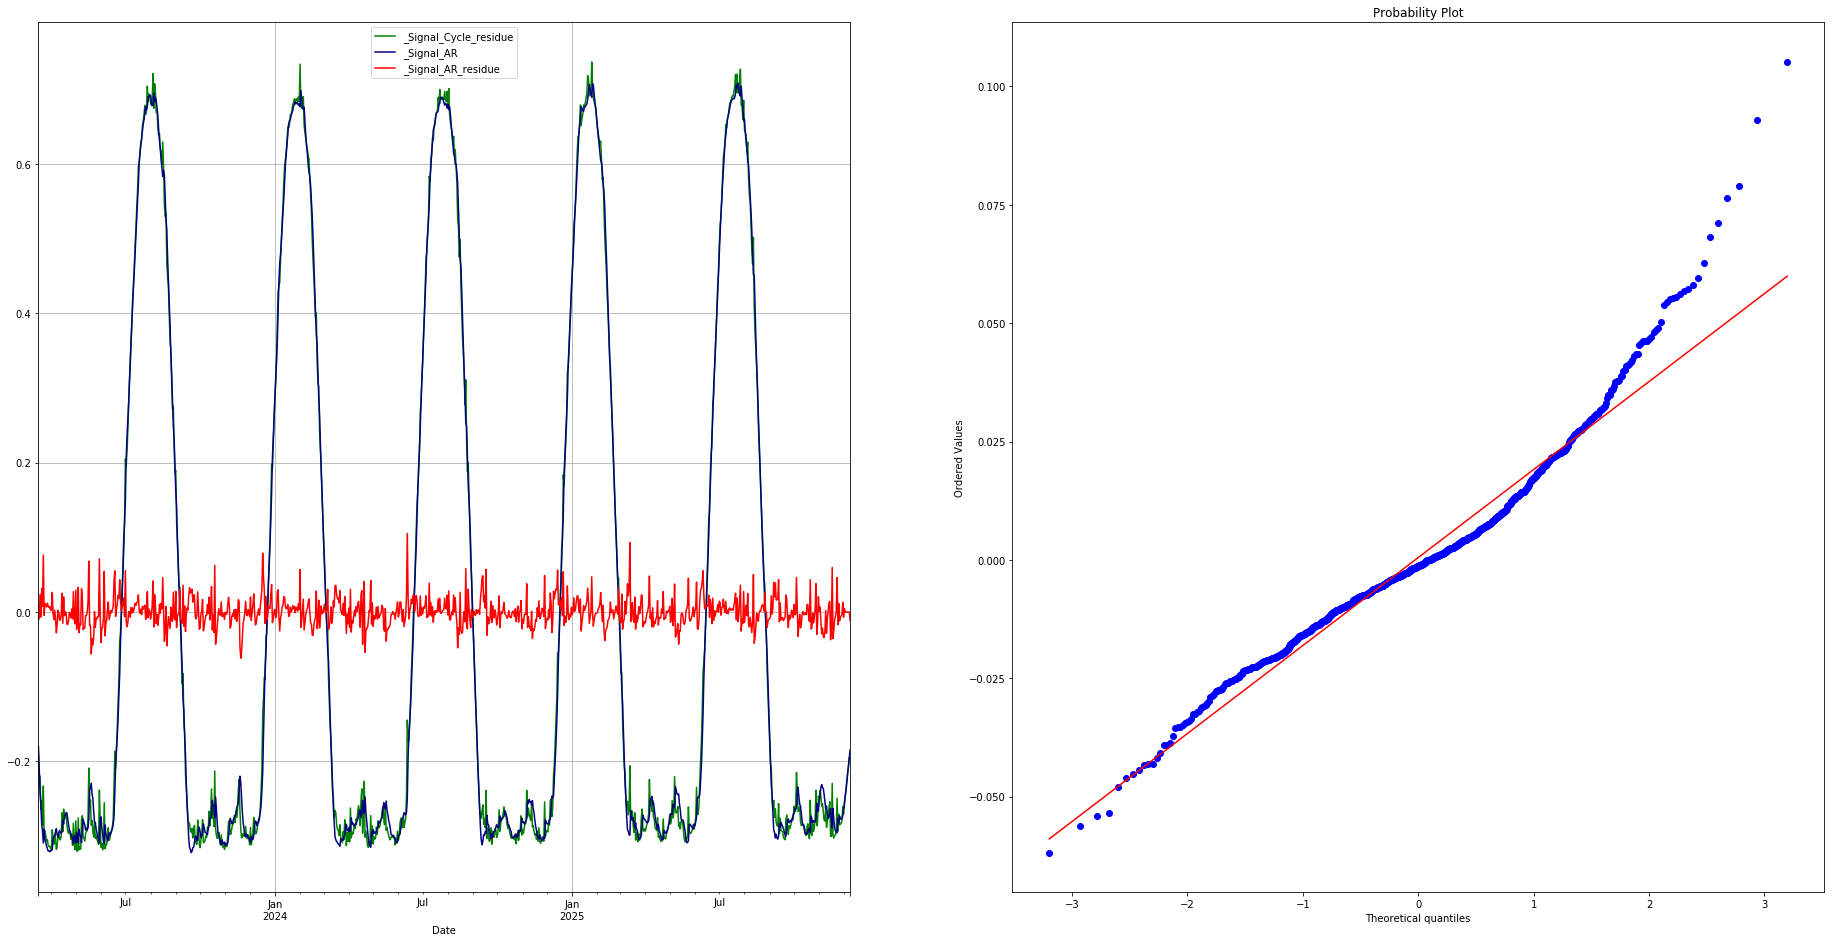

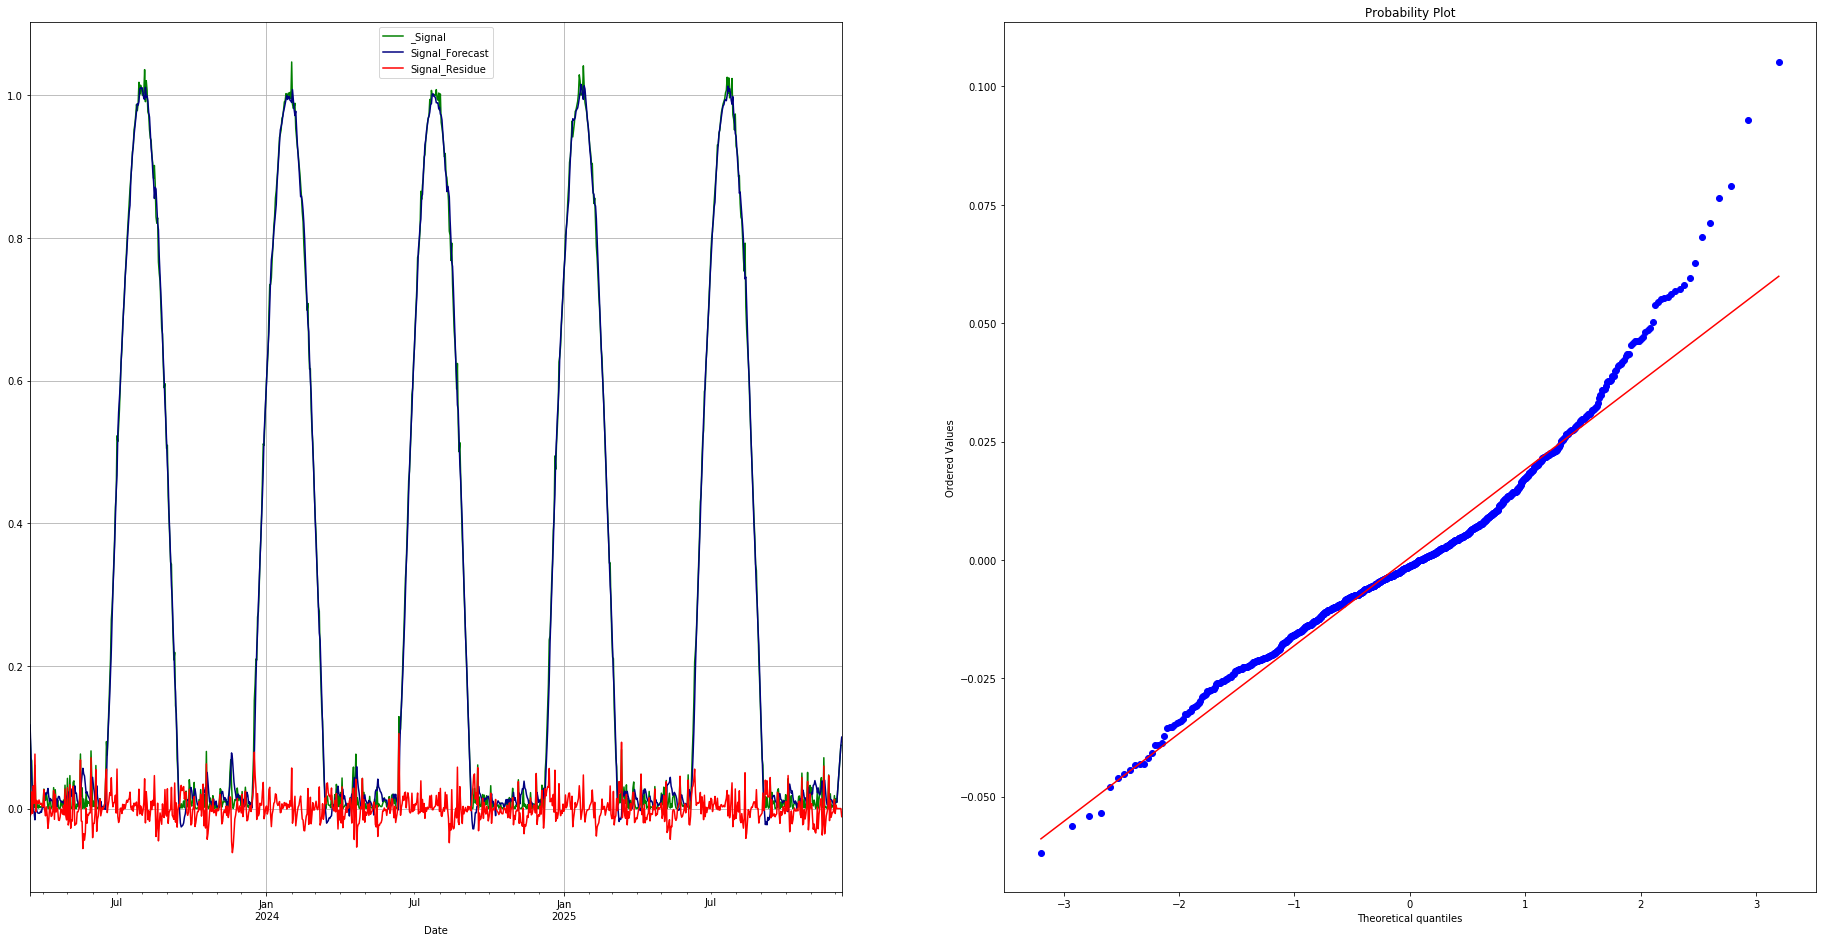

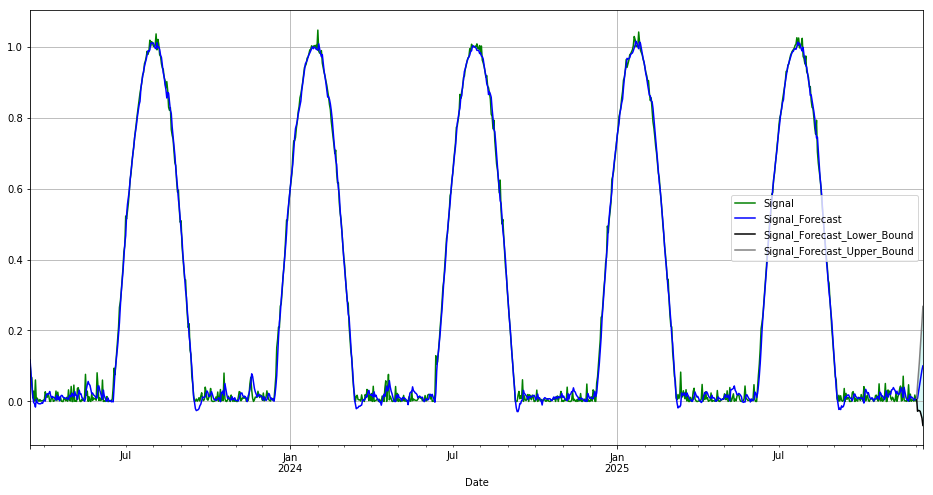

In [5]:
lEngine.standrdPlots()

In [6]:
lEngine2 = autof.cForecastEngine()
lEngine2.mOptions.set_active_transformations([])
lEngine2.mOptions.set_active_trends(['LinearTrend' , 'PolyTrend'])
lEngine2.mOptions.mForecastRectifier = "relu"
lEngine2.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine2.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Signal' 2.4499406814575195
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2023-12-07T00:00:00.000000 TimeDelta=1 days Estimation = (0 , 2874) Validation = (2874 , 3593) Test = (3593 , 3600) Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_Signal' Min=3.14325763451e-09 Max=1.07816541727  Mean=0.328210672281 StdDev=0.38556152364
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_LinearTrend_residue_bestCycle_byL2_residue_AR(64)' [LinearTrend + Cycle_Length_30 + AR(64)]
INFO:pyaf.std:TREND_DETAIL '_Signal_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_LinearTrend_residue_bestCycle_byL2' [Cycle_Length_30]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_LinearTrend_residue_bestCycle_byL2_residue_AR(64)' [AR(64)]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=2827.2811 MAPE_Forecast=838.5239 MAPE_Test=4.5133
INFO:pyaf.std:MODEL_SMAPE S

INFO:pyaf.std:START_PLOTTING
/home/antoine/dev/python/packages/pyaf/TS/Plots.py:30: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/antoine/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/anto

INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.9544663429260254


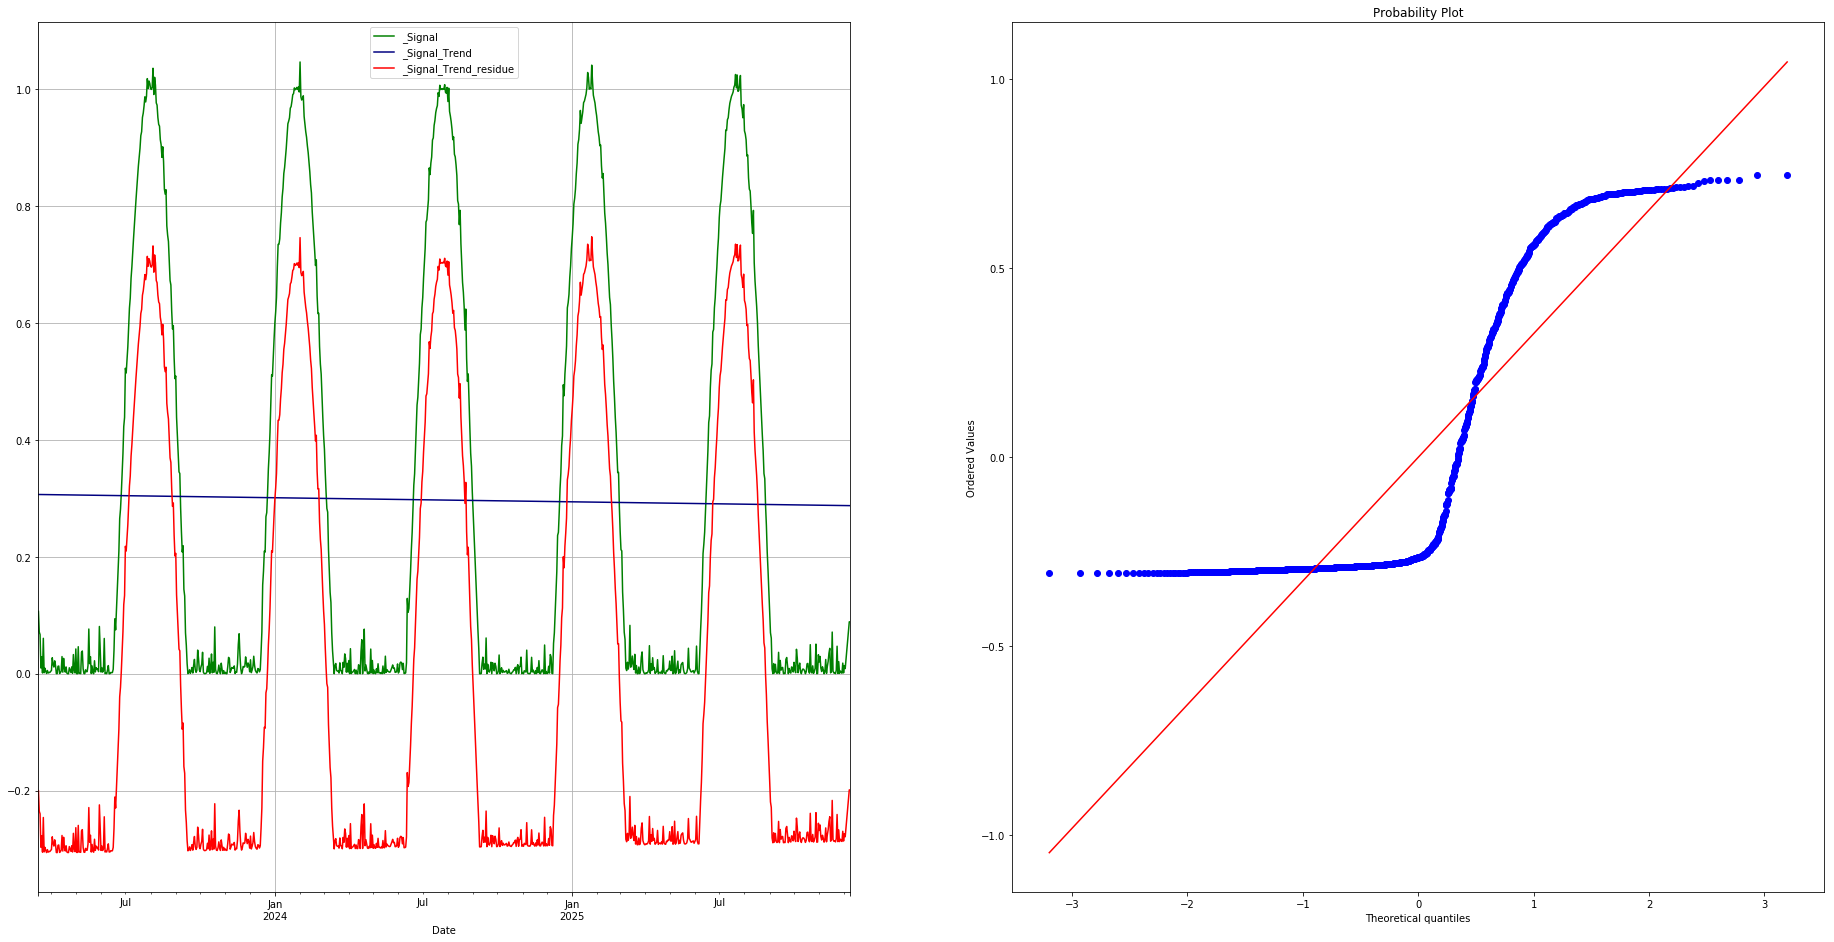

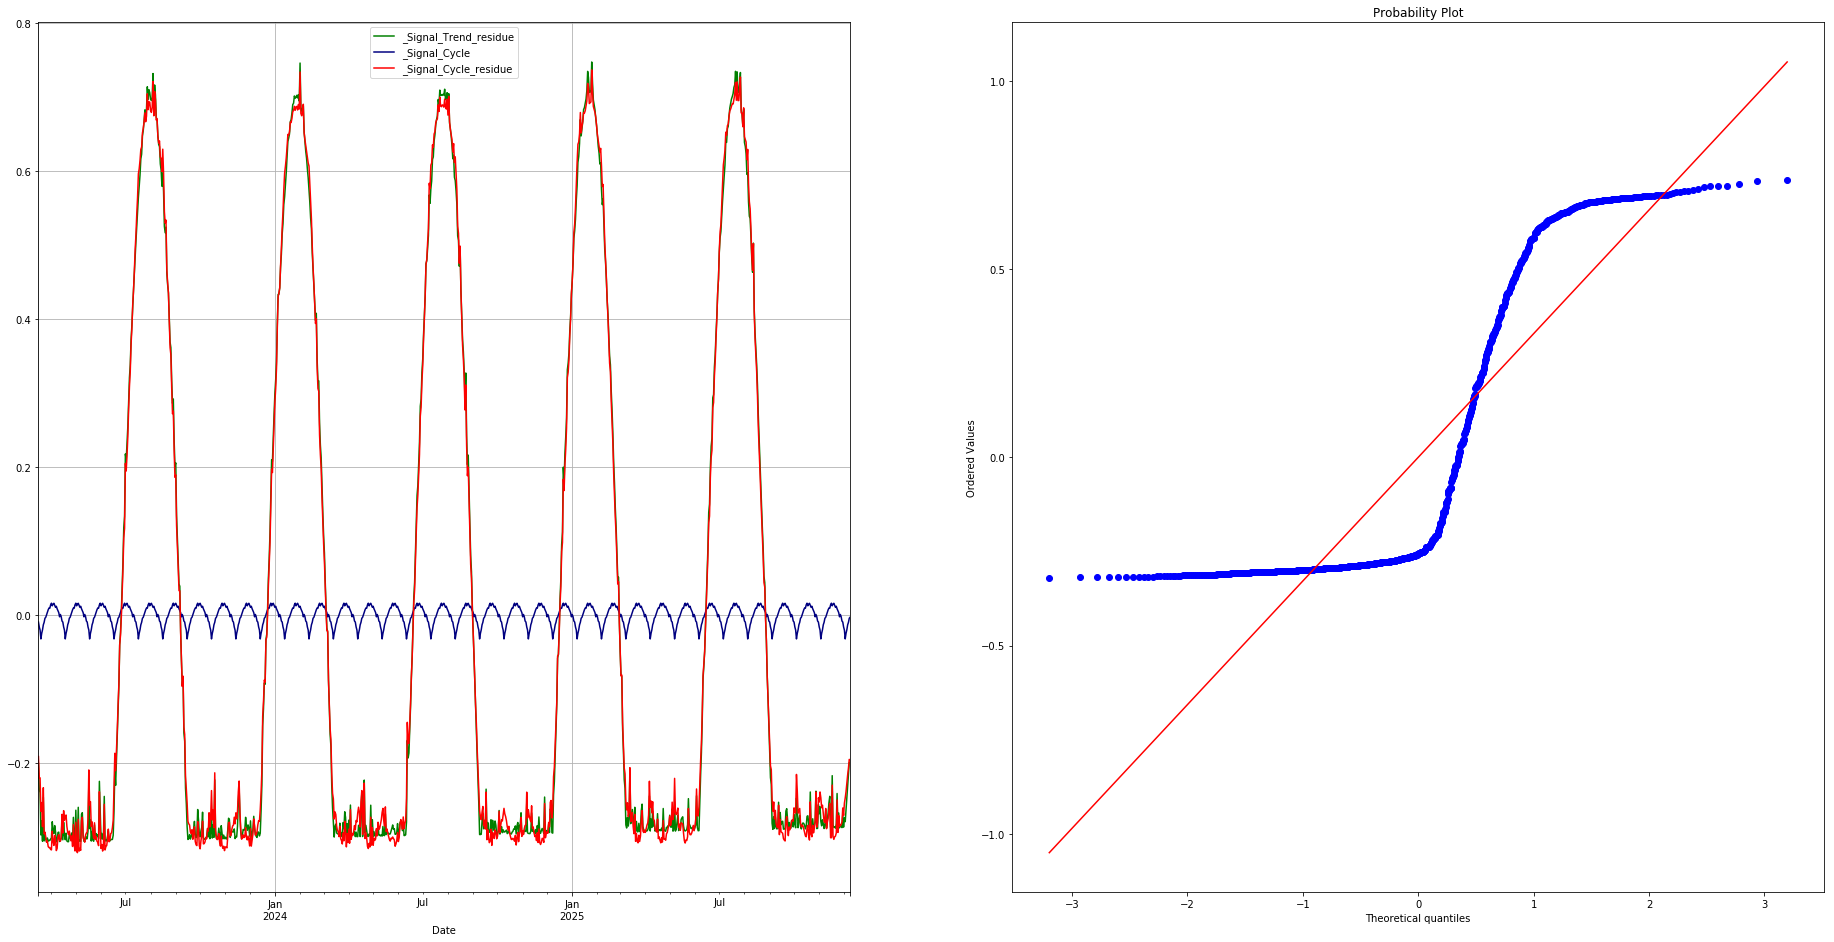

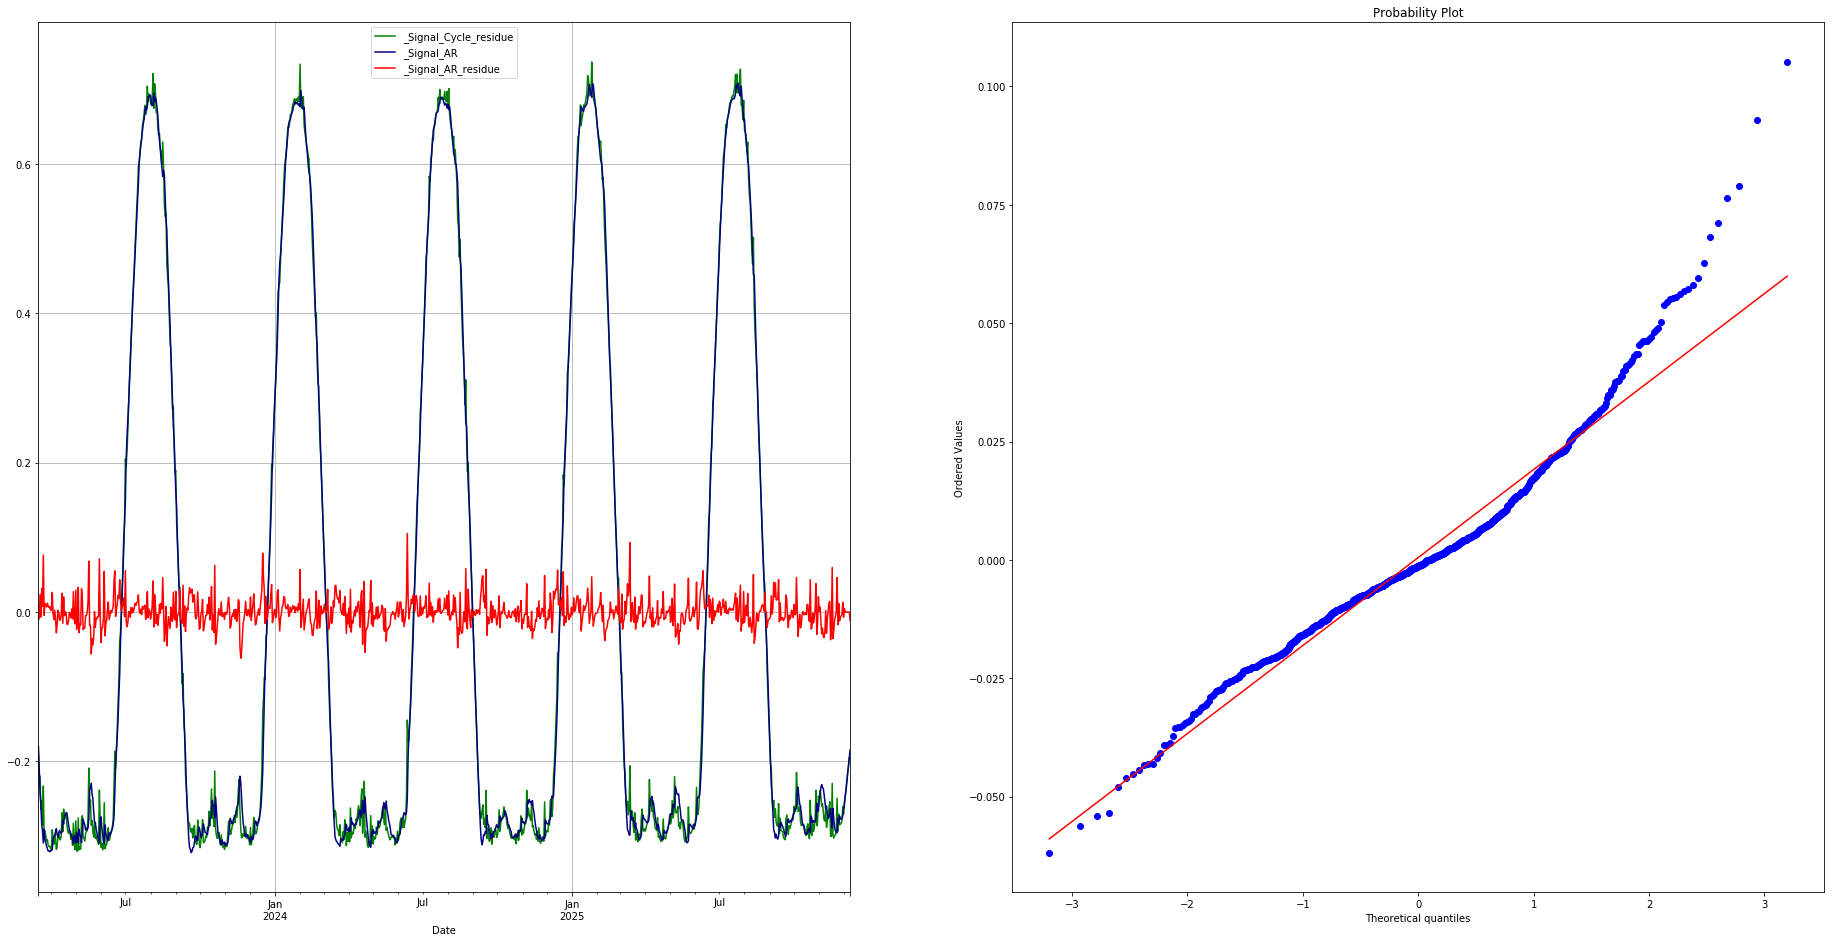

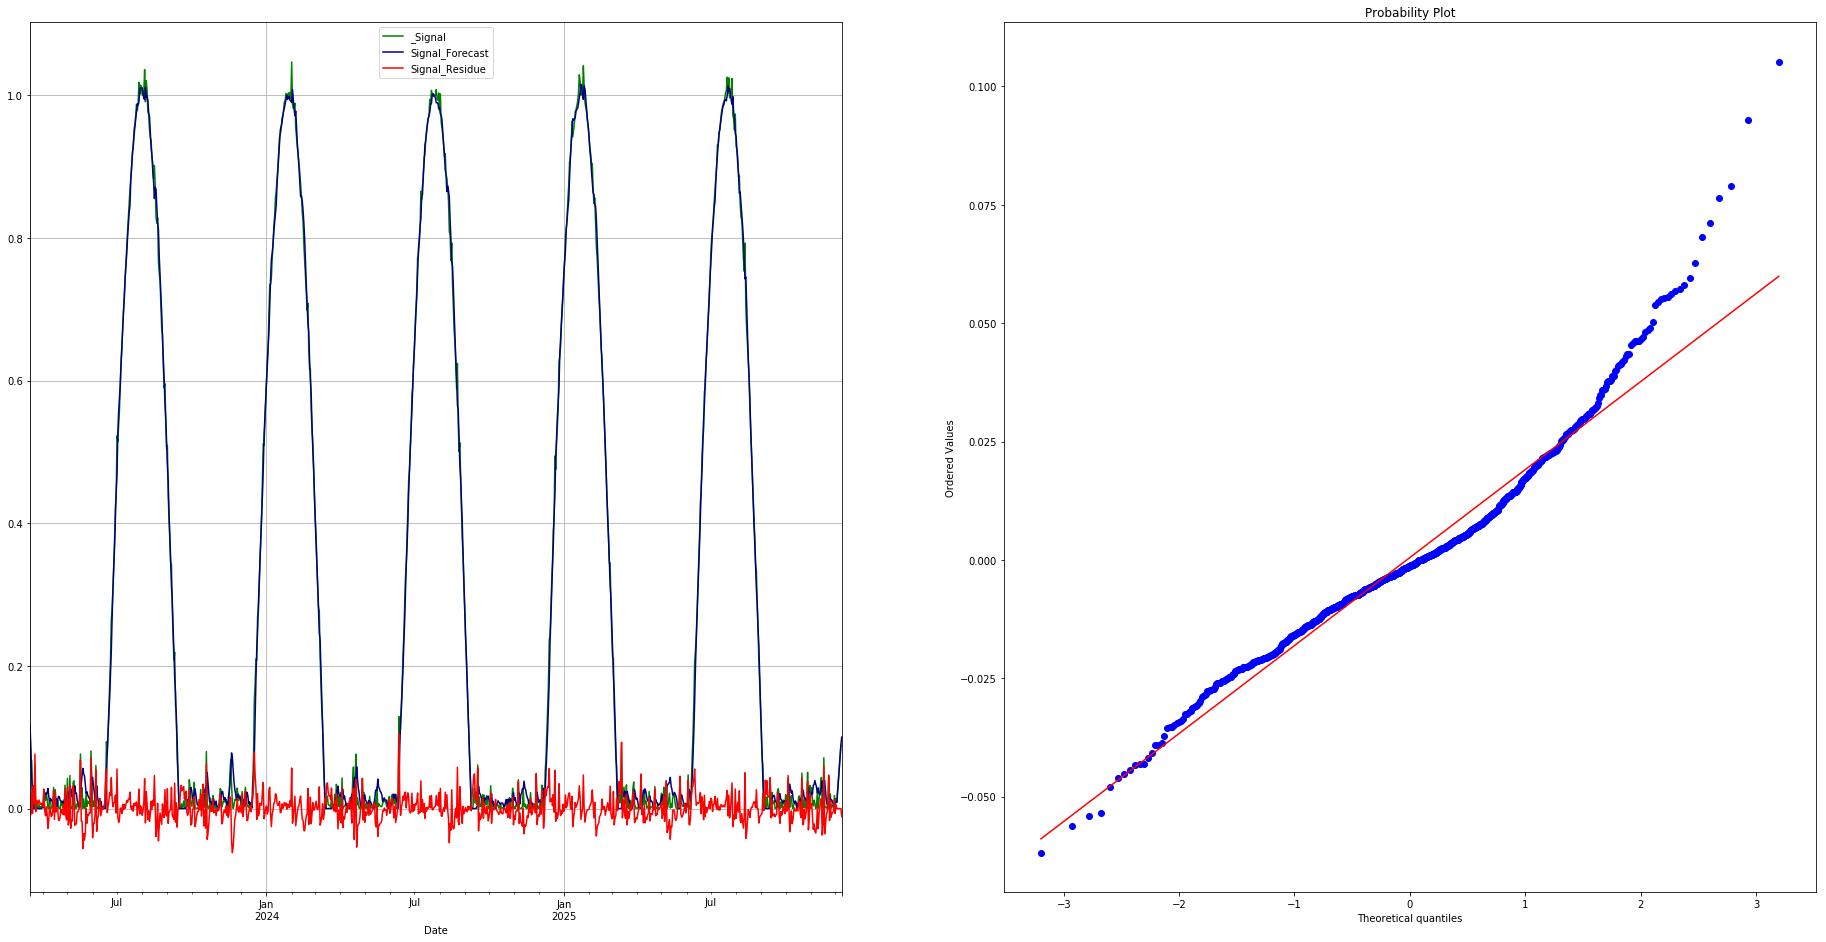

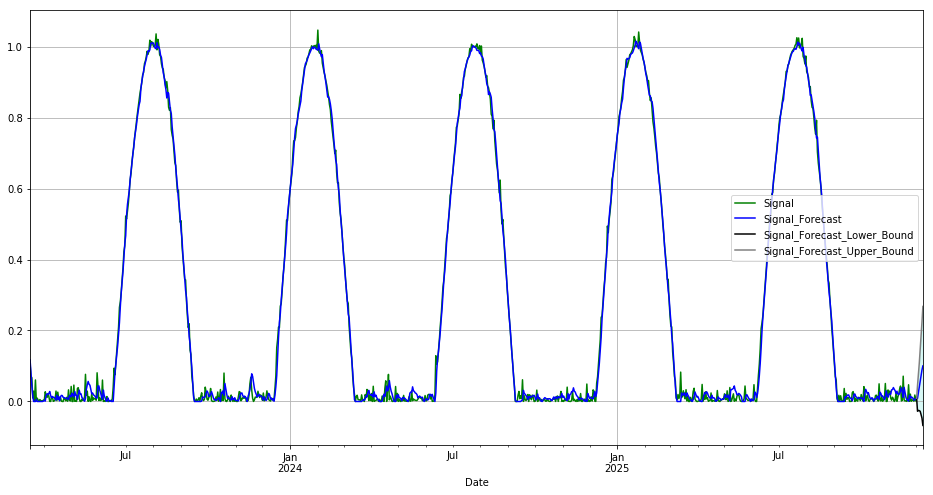

In [7]:
lEngine2.standrdPlots()